In [21]:
import pandas as pd
import numpy as np
import re
import string
import os
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly as ply

# import pandas_datareader.data as web
init_notebook_mode(connected=True)

In [22]:
terror=pd.read_csv('../../globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

/Users/princegrover/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [23]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
df = pd.crosstab(top_groups10.Year,top_groups10.Group)

In [24]:
# from bokeh.io import output_file, show
# from bokeh.layouts import gridplot
# from bokeh.plotting import figure

# output_file("panning.html")

# top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
# df = pd.crosstab(top_groups10.Year,top_groups10.Group)

# # create a new plot
# s1 = figure(plot_width=250, plot_height=250, title=None)
# s1.line(df.index, df[df.columns[0]],color="navy", alpha=0.5)
# s1.line(df.index, df[df.columns[1]],  color="firebrick", alpha=0.5)
# s1.line(df.index, df[df.columns[2]], color="olive", alpha=0.5)

# # create a new plot and share both ranges
# s2 = figure(plot_width=250, plot_height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
# s2.hbar(df[df.columns[0]],0.5,  color="olive", alpha=0.5, right=df.index)


# # create a new plot and share only one range
# s3 = figure(plot_width=250, plot_height=250, x_range=s1.x_range, title=None)
# p = gridplot([[s1, s2]])

# # show the results
# show(p)

In [25]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
df = pd.crosstab(top_groups10.Year,top_groups10.Group)
# df.head()

In [6]:
data = []
data1 = []

for col in df.columns[0:]:
    data.append(go.Scatter(x=df.index.values,
                        y=df[col],
                        name= col,
                        visible=True, hoverinfo = "none", hoveron = 'box'))


buttons = []

for row, city in df.iteritems():
    condition = [False]*len(df.columns)
    condition[list(df.columns).index(row)] = True    
    buttons.append(dict(label = row,
                 method = 'update',
                 args = [{'visible': condition},
                         {'title': 'Activity of Terrorist Groups ' + row,
                          }]))

updatemenus=list([
    dict(
        buttons = buttons,
        pad = {'r': 0, 't': 10},
#         x = 0.1,
        xanchor = 'left',
#        y = 1.0,
        yanchor = 'bottom',
        bgcolor = 'FFFFFF',
        active = 99,
        bordercolor = '#000066',
        font = dict(size=11, color='#000000'))])

layout = dict(title='Activity of Terrorist Groups ',
              showlegend=True,
              updatemenus=updatemenus,
              width=900,
              height=400,  
              xaxis=dict(title='Year'), 
              yaxis=dict(title='Number of Attacks'))

figure = dict(data=data, layout=layout)
py.iplot( figure, validate=False, filename='page3' )
#plotly.offline.plot(figure)
# iplot(figure, filename='page3.html')
# ply.offline.plot(figure, filename='page3.html')

In [31]:
top_groups50=terror[terror['Group'].isin(terror['Group'].value_counts()[:21].index)]
df = pd.crosstab(top_groups50.Year,top_groups50.Group)
# df.head()

In [32]:
df = pd.crosstab(top_groups50.AttackType,top_groups50.Group)
# df.head()

In [50]:
data = []
data1 = []
for col in df.columns[0:]:
    data.append(go.Bar(y=df.index.values,
                        x=df[col],
                        orientation = 'h',
                        name=col,
                        visible=True, hoverinfo = 'skip'))
    

buttons = []

for row, city in df.iteritems():
    condition = [False]*len(df.columns)
    condition[list(df.columns).index(row)] = True    
    buttons.append(dict(label = row,
                 method = 'update',
                 args = [{'visible': condition},
                         {'title': 'Attack Types ' + row,
                          }]))

updatemenus=list([
    dict(
        buttons = buttons,
        pad = {'r':0, 't': 10},
        x = 0.1,
        xanchor = 'center',
       y = 1.0,
        yanchor = 'bottom',
        bgcolor = 'FFFFFF',
        active = 99,
        bordercolor = '#000066',
        font = dict(size=11, color='#000000'))])

layout = dict(title='Attack Types ', 
              margin = {'l':100 },
              showlegend=True, 
              mirror = True,
              updatemenus=updatemenus, 
              width=900,
              height=600,  
              xaxis=dict(title='Numbers'), 
#               yaxis=dict(title='Type of Attack')
             )
figure = dict(data=data, layout=layout)

#plotly.offline.plot(figure)
# iplot(figure)
py.iplot( figure, validate=False, filename='page3_2' )

# ply.offline.plot(figure, filename='page3_2.html')

In [29]:
df = pd.crosstab(top_groups50.Country,top_groups50.Group)
# df.head()

In [51]:
data = []
data1 = []
for col in df.columns[0:]:
    data.append(go.Bar(y=df.index.values,
                        x=df[col],
                       orientation='h',
                        name=col,
                        visible=True, hoverinfo = 'skip'))
    

buttons = []

for row, city in df.iteritems():
    condition = [False]*len(df.columns)
    condition[list(df.columns).index(row)] = True    
    buttons.append(dict(label = row,
                 method = 'update',
                 args = [{'visible': condition},
                         {'title': 'Attacks by Country ' + row,
                          }]))

updatemenus=list([
    dict(
        buttons = buttons,
        pad = {'r': 0, 't': 10},
#         x = 0.1,
        xanchor = 'left',
#        y = 1.0,
        yanchor = 'bottom',
        bgcolor = 'FFFFFF',
        active = 99,
        bordercolor = '#000066',
        font = dict(size=11, color='#000000'))])

layout = dict(title='Attacks by Country ', 
              showlegend=True, updatemenus=updatemenus,
              width=900,
              height=600,
              xaxis=dict(title='Numbers'), 
#               yaxis=dict(title='Country')
             )

figure = dict(data=data, layout=layout)

#plotly.offline.plot(figure)
# iplot(figure)
# ply.offline.plot(figure, filename='page3_3.html')
py.iplot( figure, validate=False, filename='page3_3' )


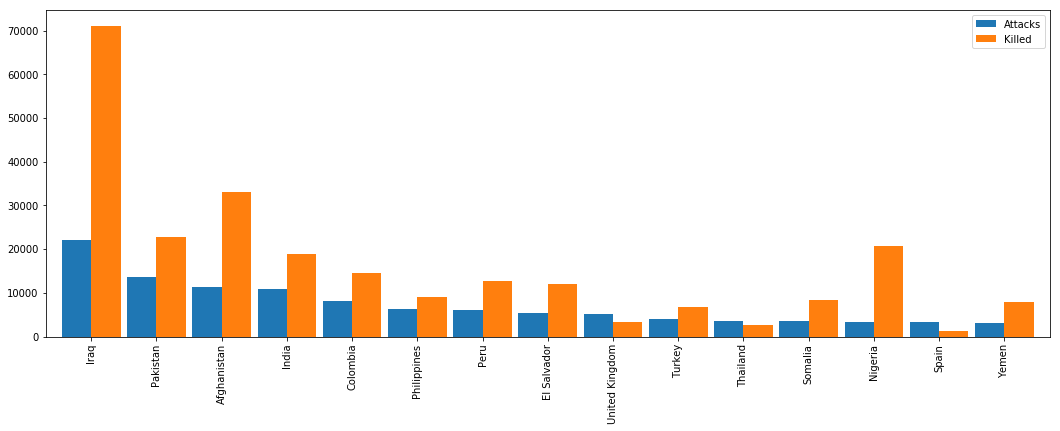

In [14]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()